In [91]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

1. Load the Dataset

In [92]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [93]:
X_train.shape

(60000, 28, 28)

In [94]:
X_test.shape

(10000, 28, 28)

In [95]:
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

In [96]:
X_train = tf.image.resize_with_crop_or_pad(X_train, 32, 32)
X_test = tf.image.resize_with_crop_or_pad(X_test, 32, 32)

In [97]:
X_train.shape

TensorShape([60000, 32, 32, 1])

Since the images are grayscale, they have a single channel. Add channel to ensure the data shape 
matches the CNN’s expected input shape of (batch, height, width, channels)

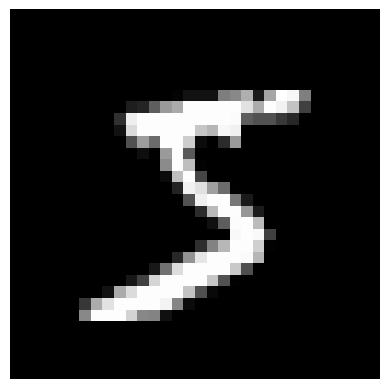

In [98]:
im = tf.squeeze(X_train)
plt.imshow(im[0], cmap='gray')
plt.axis('off')
plt.show()

Normalize the images to a [0, 1] range and reshape them into 32x32 size

In [99]:
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

TensorShape([60000, 32, 32, 1])

In [100]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [101]:
y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

2. Define the LeNet-5 Architecture

In [102]:
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), strides=1, padding='valid', input_shape=(32, 32, 1)),
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(16, kernel_size=(5, 5), strides=1),
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_14            │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_15            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [120]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
1500/1500 - 11s - 8ms/step - accuracy: 0.9865 - loss: 0.0408 - val_accuracy: 0.9665 - val_loss: 0.1424
Epoch 2/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9893 - loss: 0.0322 - val_accuracy: 0.9748 - val_loss: 0.0994
Epoch 3/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9756 - val_loss: 0.1053
Epoch 4/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9917 - loss: 0.0259 - val_accuracy: 0.9780 - val_loss: 0.1065
Epoch 5/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9914 - loss: 0.0260 - val_accuracy: 0.9759 - val_loss: 0.1051
Epoch 6/10
1500/1500 - 14s - 9ms/step - accuracy: 0.9920 - loss: 0.0236 - val_accuracy: 0.9776 - val_loss: 0.1037
Epoch 7/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.9767 - val_loss: 0.1103
Epoch 8/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9927 - loss: 0.0212 - val_accuracy: 0.9758 - val_loss: 0.1110
Epoch 9/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9930 - loss: 0.0212 - val_accuracy: 

In [106]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_14            │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_15            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [113]:
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [127]:
y_pred = y_pred.round()

In [124]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [128]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.1201


In [129]:
print(f"{test_accuracy * 100:.2f}")

97.66


In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.99      0.94      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.95      0.96      1009

   micro avg       0.98      0.97      0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.97      0.98     10000
 samples avg       0.97      0.97      0.97     10000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
